In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')





In [2]:
# df = pd.read_csv('/kaggle/input/smart-agricultural-production-optimizing-engine/Crop_recommendation.csv')
df = pd.read_csv('./Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Data Visualization

In [11]:
df['NPK Total'] = df['N'] + df['P'] + df['K']

df['Nitrogen (%)'] = (df['N'] / df['NPK Total']) * 100
df['Phosphorus (%)'] = (df['P'] / df['NPK Total']) * 100
df['Potassium (%)'] = (df['K'] / df['NPK Total']) * 100


In [12]:
grouped_df = df.groupby('label').mean()

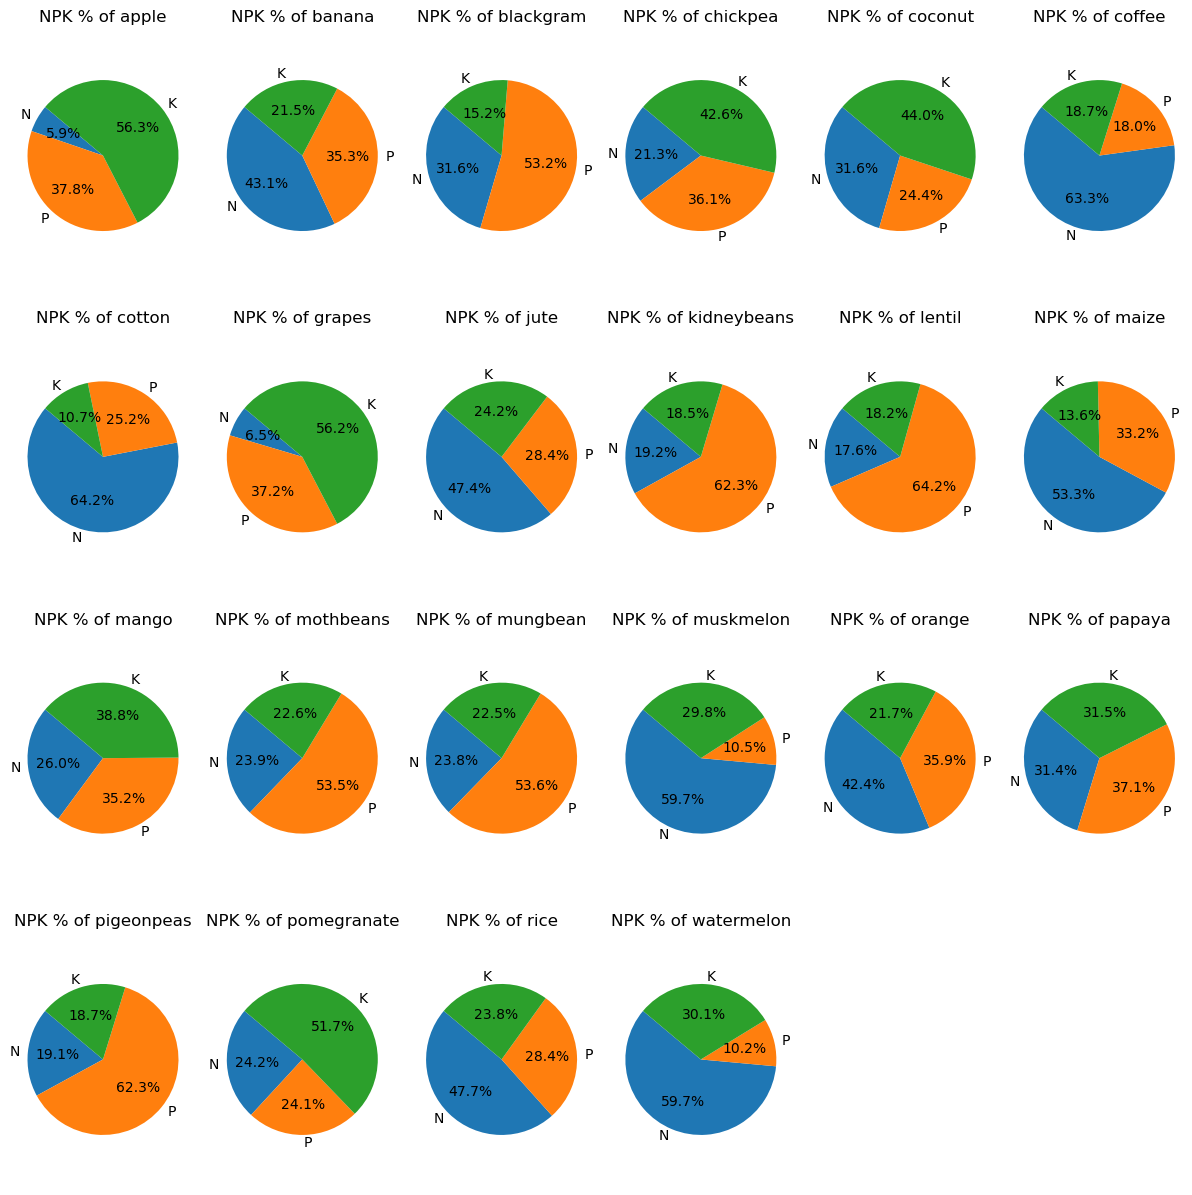

In [13]:
plt.figure(figsize=(15,15))

i = 0
for crop in grouped_df.index :
    
    labels = ['N', 'P', 'K']
    sizes = [grouped_df['N'].values[i], grouped_df['P'].values[i], grouped_df['K'].values[i]]

    ax = plt.subplot(4 , 6 , i+1)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('NPK % of ' + crop)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
    i+=1
plt.show()


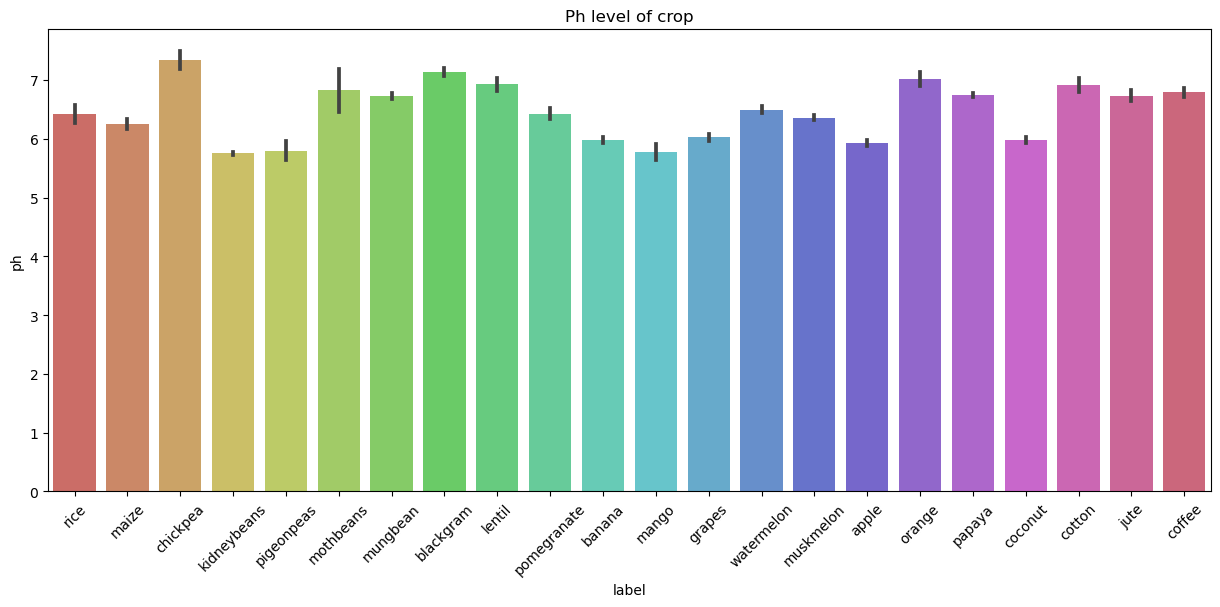

In [14]:
plt.figure(figsize=(15,6))
sn.barplot(y = 'ph', x = 'label', data=df, palette = 'hls')
plt.xticks(rotation = 45)
plt.title('Ph level of crop')
plt.show()

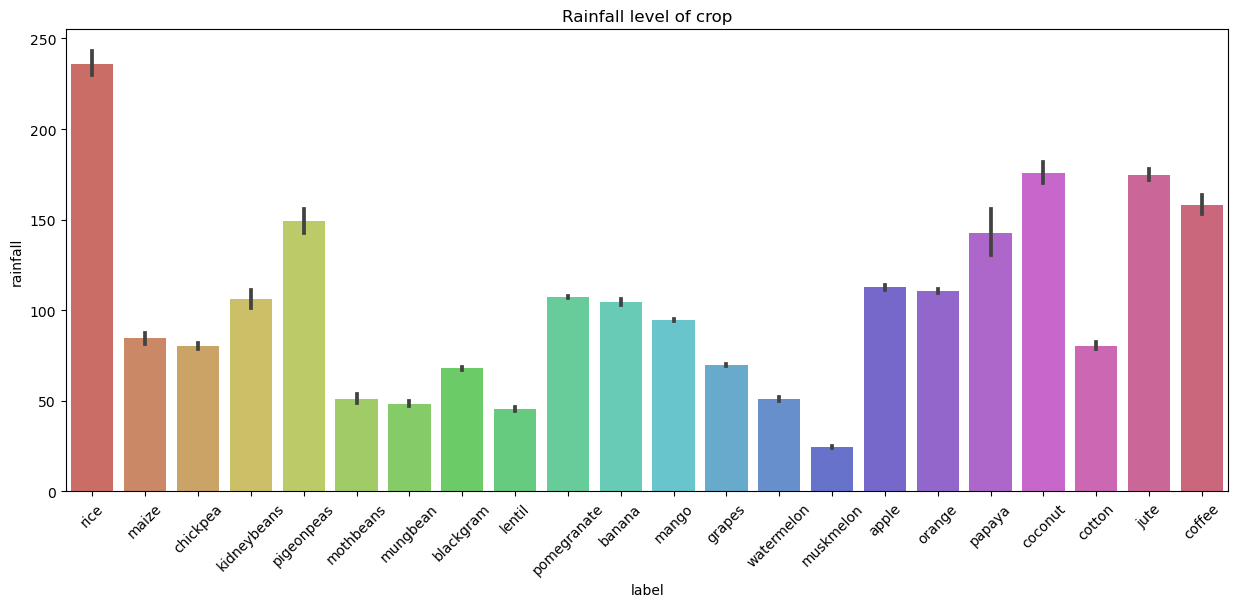

In [15]:
# plt.figure(figsize=(15,6))
# sn.barplot(y = 'rainfall', x = 'label', data=df, palette = 'hls')
# plt.xticks(rotation = 45)

# plt.title('Rainfall level of crop')
# plt.show()

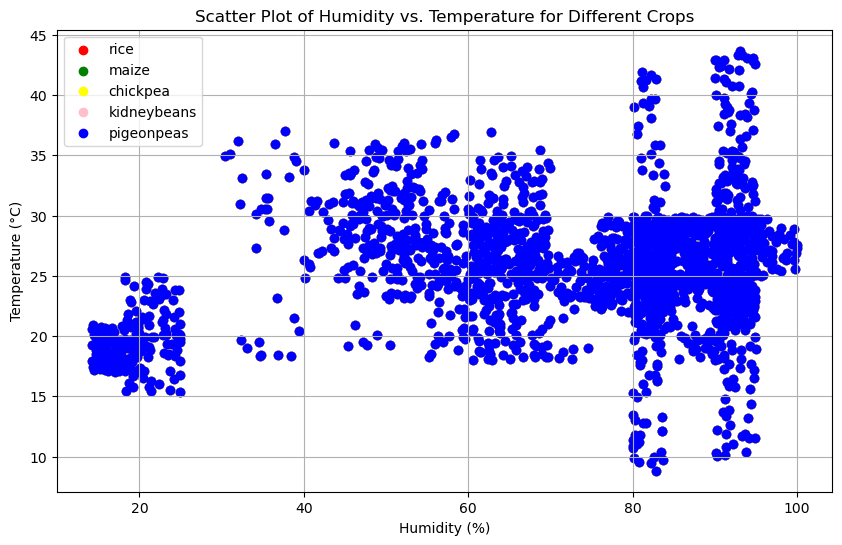

In [16]:
plt.figure(figsize=(10, 6))

colors = [ 'red' , 'green' , 'yellow' , 'pink' , 'blue']

for i,crop_name in enumerate(df.label.unique()[:5]):
    crop_data = df[df['label'] == crop_name]
    plt.scatter(df['humidity'], df['temperature'], label=crop_name , color = colors[i])

    
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Scatter Plot of Humidity vs. Temperature for Different Crops')

plt.legend()
plt.grid(True)
plt.show()


In [17]:
df.drop('label',axis=1).corr()

,N,P,K,temperature,humidity,ph,rainfall,NPK Total,Nitrogen (%),Phosphorus (%),Potassium (%)
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,0.277354,0.879782,-0.642713,-0.437898
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.772406,-0.551386,0.440378,0.229928
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.872711,-0.400200,-0.127987,0.697246
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.142043,0.060672,0.009274,-0.093703
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.160035,0.217131,-0.435225,0.219662
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.119727,0.147262,-0.022654,-0.173924
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.032966,0.087161,-0.126867,0.031491
NPK Total,0.277354,0.772406,0.872711,-0.142043,0.160035,-0.119727,-0.032966,1.000000,-0.074801,-0.196240,0.334496
Nitrogen (%),0.879782,-0.551386,-0.400200,0.060672,0.217131,0.147262,0.087161,-0.074801,1.000000,-0.700326,-0.533530
Phosphorus (%),-0.642713,0.440378,-0.127987,0.009274,-0.435225,-0.022654,-0.126867,-0.196240,-0.700326,1.000000,-0.230093


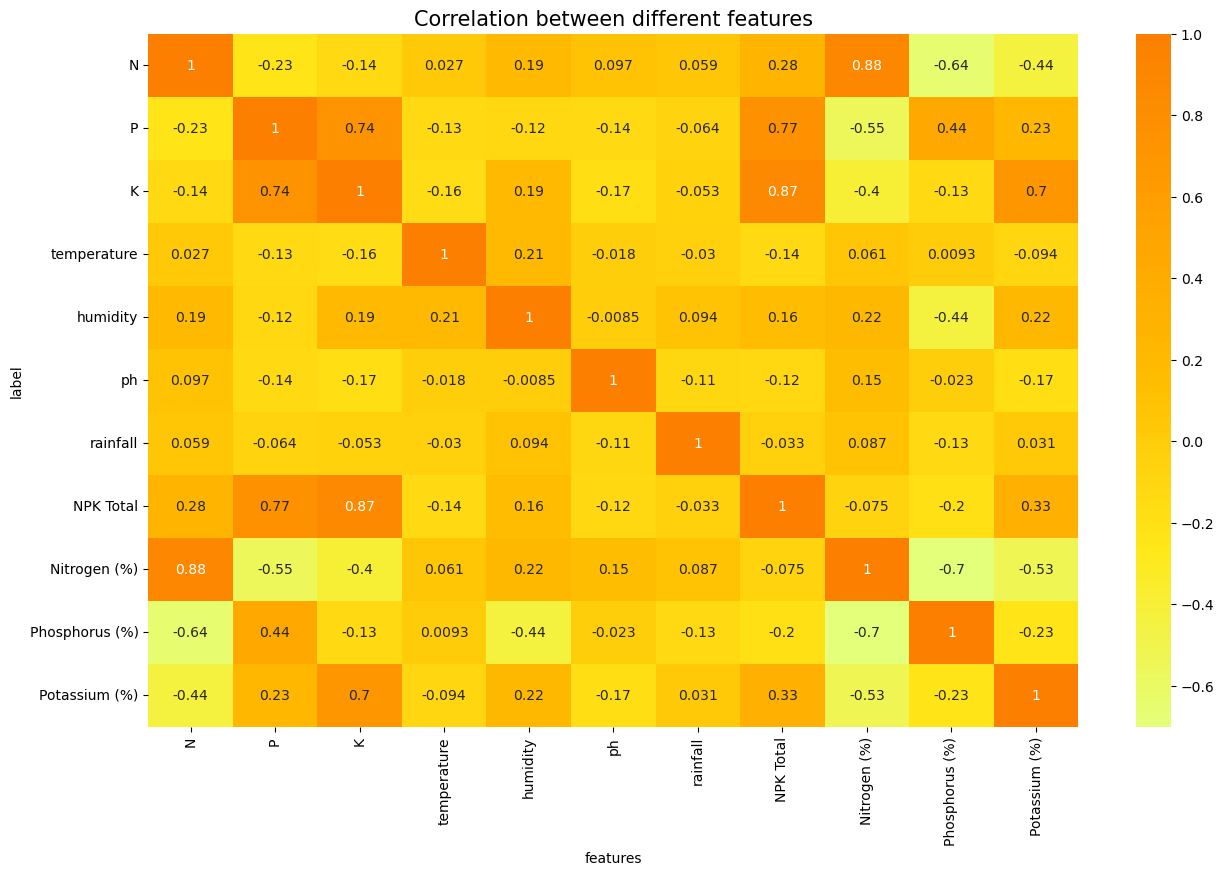

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))

sn.heatmap(df.drop('label',axis=1).corr(), annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='label')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

# Data Preprocessing

In [19]:
from sklearn.preprocessing import LabelEncoder

target_variable = df.label.unique()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
encoded_target = label_encoder.fit_transform(target_variable)
encoded_target

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [20]:
label_encoder.transform(['rice','maize'])

array([20, 11])

In [21]:
df['target'] = label_encoder.transform(df.label)

# Splitting Train and test

In [22]:
features = df.drop(['label' , 'target'],axis= 1)
target = df['target']


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size = 0.2,
                                                    shuffle = True, random_state = 0)

In [24]:
target[:5]

0    20
1    20
2    20
3    20
4    20
Name: target, dtype: int32

In [25]:
features.head()

,N,P,K,temperature,humidity,ph,rainfall,NPK Total,Nitrogen (%),Phosphorus (%),Potassium (%)
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175,51.428571,24.000000,24.571429
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184,46.195652,31.521739,22.282609
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159,37.735849,34.591195,27.672956
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149,49.664430,23.489933,26.845638
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162,48.148148,25.925926,25.925926


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [27]:
# Define models to compare
models_grid = [
      (
        'Random Forest',
        RandomForestClassifier() , 
           {
    'n_estimators':[350,400],
    'max_depth':[2,3],
    'min_samples_split':[2,5,8]
                
        }),
    (
        'DecisionTreClassifier' ,
        DecisionTreeClassifier(),
         {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    } 
    ),
    
    (
        'SVM',
        SVC(),
        {
    'C': [0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 4],
}
    )
]

 


In [47]:
# evaluation metric 
scoring = 'accuracy'
results = []

for model_name, model,param_grid in models_grid:

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5 , verbose = 1)
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    test_score = best_model.score(X_test, y_test)
    
    print( '-------' , model_name , '-----------')
    print('Best Parameters : ' , best_params)
    print('test Score : ' ,test_score)
    print('\n')
    
    results.append( [model_name  ,best_params  , test_score])


Fitting 5 folds for each of 12 candidates, totalling 60 fits
------- Random Forest -----------
Best Parameters :  {'max_depth': 3, 'min_samples_split': 8, 'n_estimators': 400}
test Score :  0.8568181818181818


Fitting 5 folds for each of 24 candidates, totalling 120 fits
------- DecisionTreClassifier -----------
Best Parameters :  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'splitter': 'best'}
test Score :  0.9886363636363636


Fitting 5 folds for each of 16 candidates, totalling 80 fits
------- SVM -----------
Best Parameters :  {'C': 1, 'degree': 2, 'kernel': 'linear'}
test Score :  0.9840909090909091




In [29]:
# for model_name ,best_params ,test_score in results:
#     print( '-------' , model_name , '-----------')
#     print('Best Parameters : ' , best_params)
#     print('test Score : ' ,test_score)
#     print('\n')
    


# Using XGboost algo 

In [30]:
# !pip install xgb

In [31]:
# # import xgboost as xgb
# # dtrain = xgb.DMatrix(data=X_train, label=y_train)
# # dtest = xgb.DMatrix(data=X_test, label=y_test)

# params = {
#     'objective': 'multi:softmax',
#     'num_class': len(df.label.unique()),
# }

# num_round = 100  # Number of boosting rounds (iterations)
# model = xgb.train(params, dtrain, num_round)

# from sklearn.metrics import accuracy_score

# predictions = model.predict(dtest).astype(int)

# accuracy_score(y_test ,predictions )

# We get RandomForest as best algo 
* best parameter  : 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50

In [32]:

model = RandomForestClassifier(
    max_depth = 10, 
    min_samples_split= 5, 
    n_estimators= 50
)

In [33]:
model.fit(X_train ,  y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix , classification_report  ,accuracy_score


In [36]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        18
           8       0.95      1.00      0.98        21
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        23
          17       1.00    

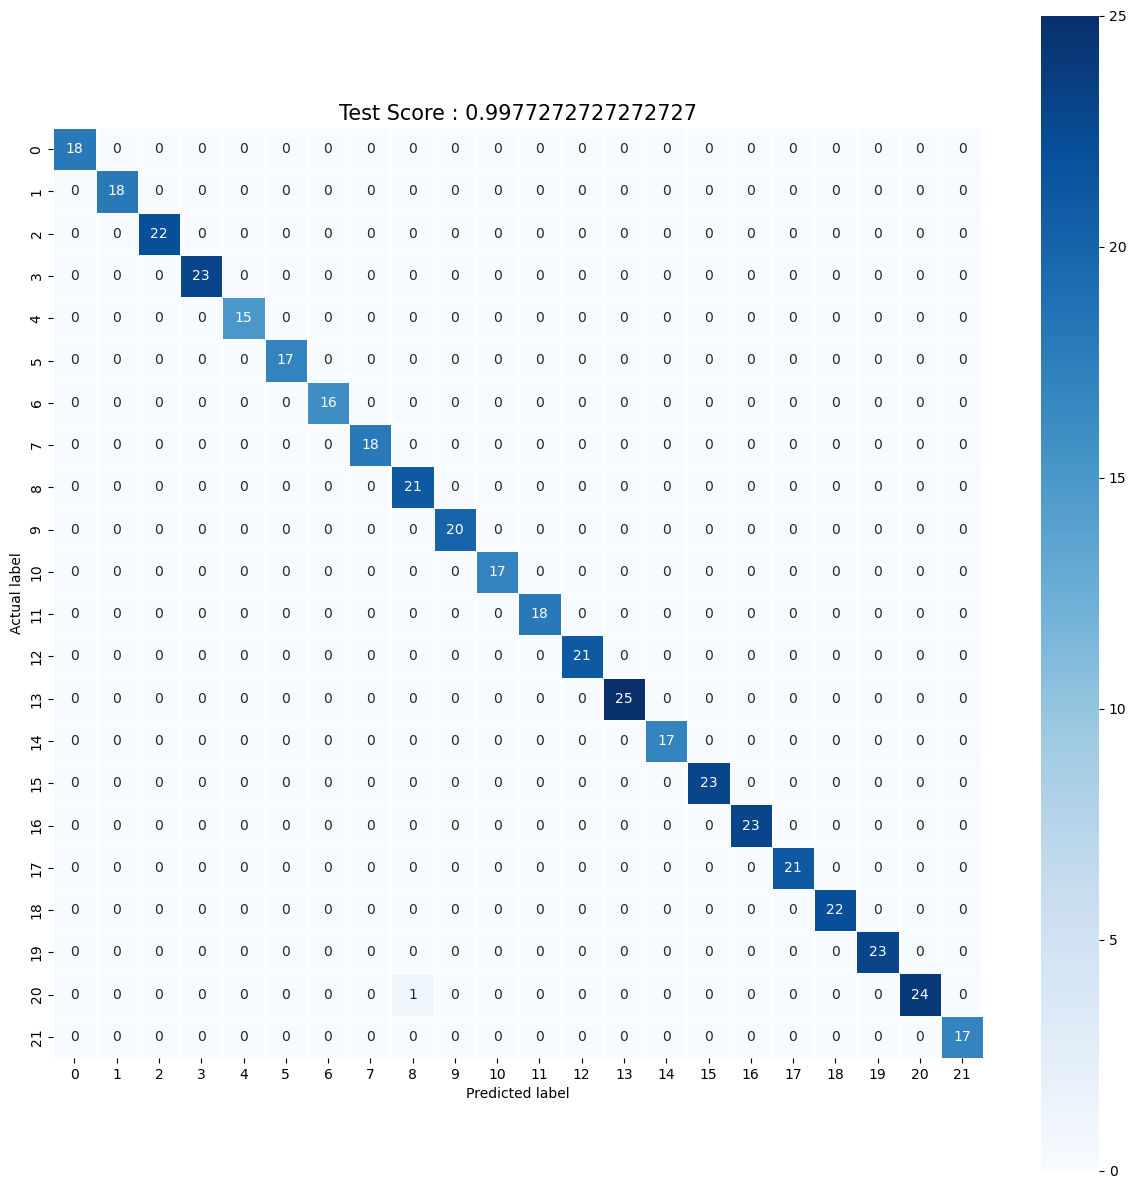

In [37]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sn.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Score : '+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [38]:
import joblib
joblib.dump(model, './saved_model/crop_recommend.pkl')
joblib.dump(label_encoder, './saved_model/label_encoder.pkl')

['./saved_model/label_encoder.pkl']

# Predicting values in Production

In [39]:
import joblib

model = joblib.load('./saved_model/crop_recommend.pkl')
label_encoder = joblib.load('./saved_model/label_encoder.pkl')

In [40]:
X_test[ 0]

array([105.        ,  14.        ,  50.        ,  26.2148837 ,
        87.6883982 ,   6.41905219,  59.65590798, 169.        ,
        62.13017751,   8.28402367,  29.58579882])

In [41]:
data = {
    'N' : 105.000000 , 
    'P' : 14.000000 ,
    'K' : 50 , 
    'temperature' : 26 ,
    'humidity' : 87 ,
    'ph' : 6 , 
    'rainfall' : 59,
}

data['NPK Total'] = data['N'] + data['P'] + data['K']
data['Nitrogen (%)'] = (data['N'] / data['NPK Total']) * 100
data['Phosphorus (%)'] = (data['P'] / data['NPK Total']) * 100
data['Potassium (%)'] = (data['K'] / data['NPK Total']) * 100
data

{'N': 105.0,
 'P': 14.0,
 'K': 50,
 'temperature': 26,
 'humidity': 87,
 'ph': 6,
 'rainfall': 59,
 'NPK Total': 169.0,
 'Nitrogen (%)': 62.1301775147929,
 'Phosphorus (%)': 8.284023668639055,
 'Potassium (%)': 29.585798816568047}

In [42]:
data_arr = list(data.values())
data_arr

[105.0,
 14.0,
 50,
 26,
 87,
 6,
 59,
 169.0,
 62.1301775147929,
 8.284023668639055,
 29.585798816568047]

In [43]:
# predictions_encoded = model.predict(X_test.iloc[ 0 , :].values.reshape(1,-1))
predictions_encoded = model.predict([data_arr])

# Decode the predictions using the label encoder
predictions_original_labels = label_encoder.inverse_transform(predictions_encoded)[0]

In [44]:
predictions_original_labels

'watermelon'

In [45]:
label_encoder.inverse_transform([y_test[0]])

array(['watermelon'], dtype=object)

In [46]:
label_encoder.inverse_transform( [y_test.iloc[0]] )

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'